In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib
import glob

In [2]:
%run dataprocessing-bin1

In [5]:
# define the folder path
# Parameter for brain dataset 
folder_path = 'Your Folder Path'
fig_path = os.path.join(folder_path, 'figures')
data_path = os.path.join(folder_path, 'ProcessedData')
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
if not os.path.exists(data_path):
    os.makedirs(data_path)

# set parameters (Please adjust based on your experiment)
# bg_time: the number of mass spectra you measured for your background
# sp_time: the number of mass spectra you measured for each replicate
bg_time = 32
sp_time = 27
# rep: the number of reps you measure for each file
reps = 5

Processing file: NP10119_A


C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaks, select[peaks], 'ro', label='Peaks',color='blue')


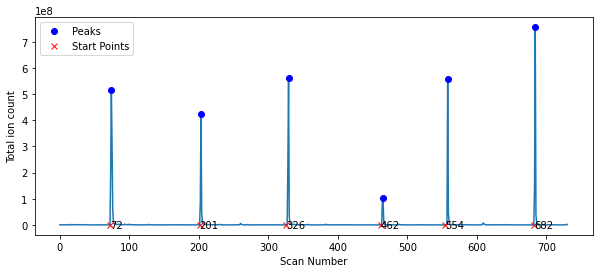

C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(tic[plot_points],'rx',color='r',label='Selected data points')


The ms_list csv file has been saved
The plot of all reps in the same figure saved
The plot of avg ms saved
avg ms csv file saved
Processing file: NP10119_C


C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaks, select[peaks], 'ro', label='Peaks',color='blue')


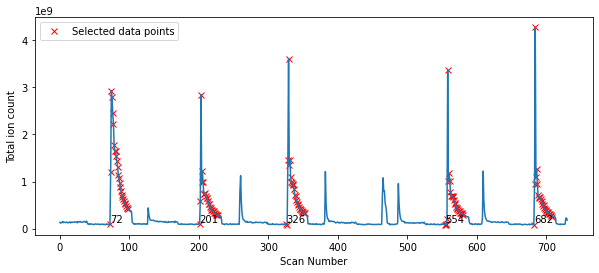

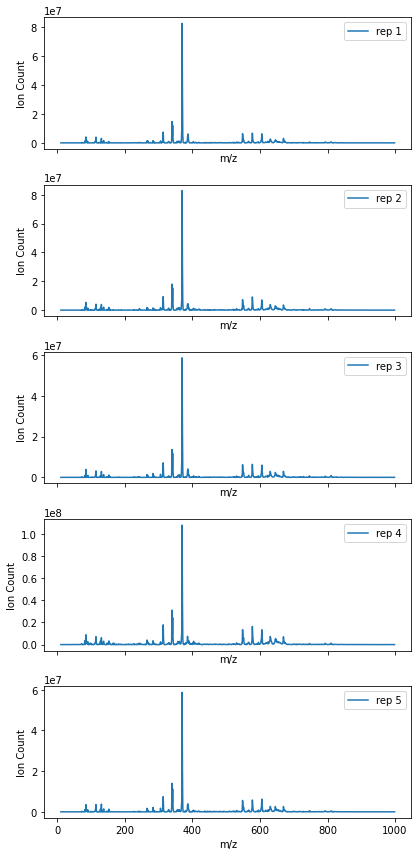

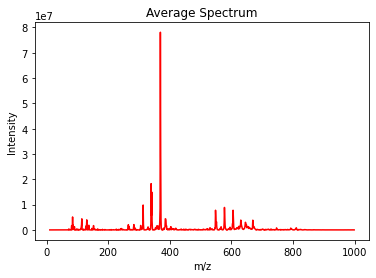

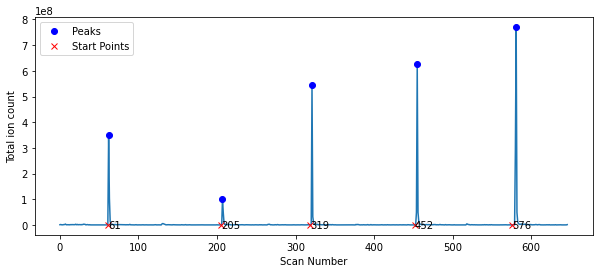

C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(tic[plot_points],'rx',color='r',label='Selected data points')


The ms_list csv file has been saved
The plot of all reps in the same figure saved
The plot of avg ms saved
avg ms csv file saved
Processing file: NP11418_A


C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaks, select[peaks], 'ro', label='Peaks',color='blue')


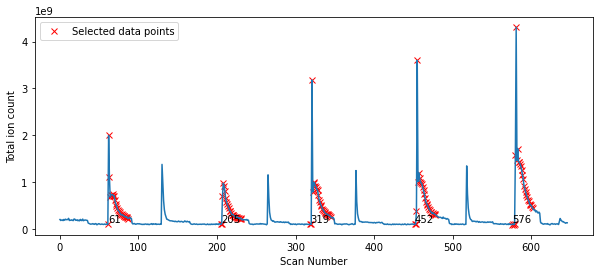

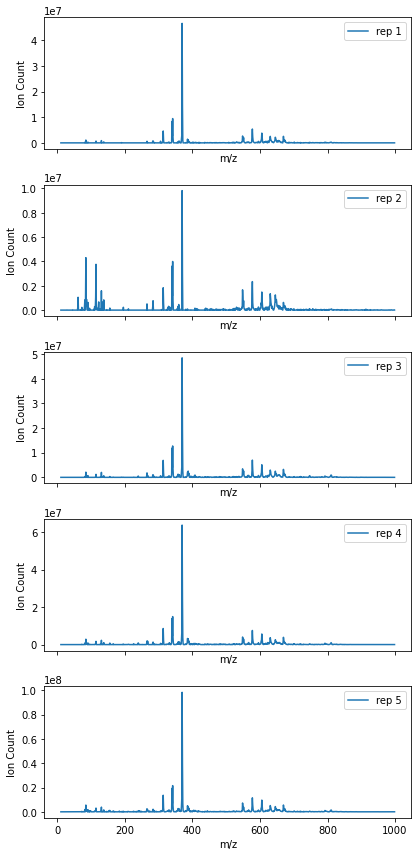

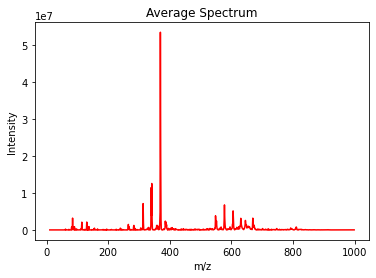

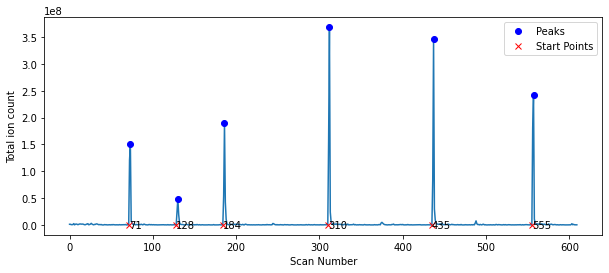

C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(tic[plot_points],'rx',color='r',label='Selected data points')


The ms_list csv file has been saved
The plot of all reps in the same figure saved
The plot of avg ms saved
avg ms csv file saved
Processing file: NP11418_C


C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaks, select[peaks], 'ro', label='Peaks',color='blue')


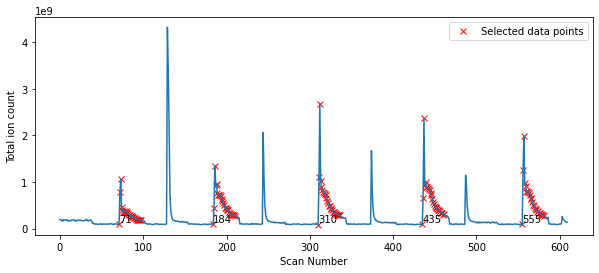

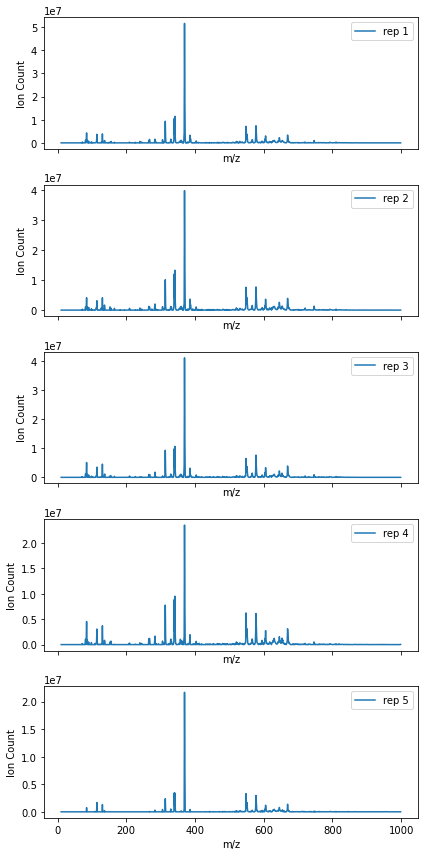

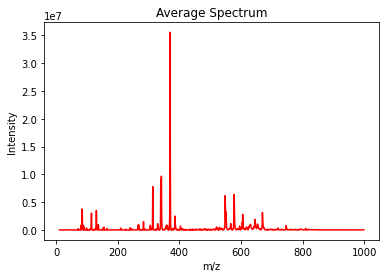

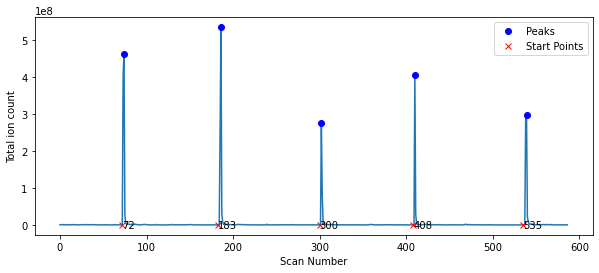

C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(tic[plot_points],'rx',color='r',label='Selected data points')


The ms_list csv file has been saved
The plot of all reps in the same figure saved
The plot of avg ms saved
avg ms csv file saved
Processing file: NP9118_A


C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaks, select[peaks], 'ro', label='Peaks',color='blue')


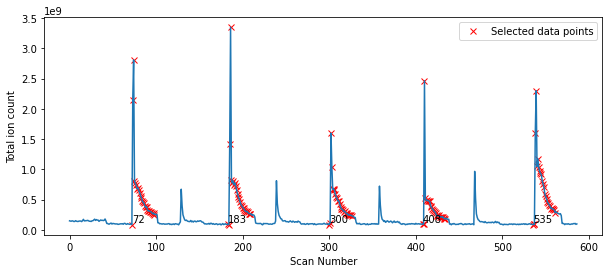

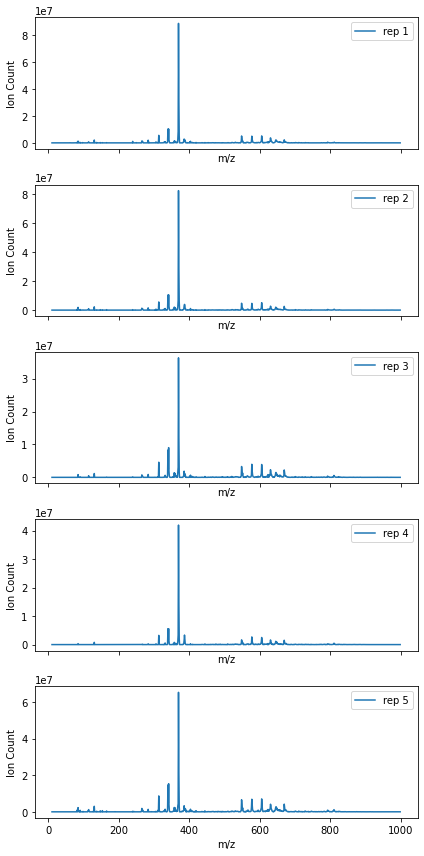

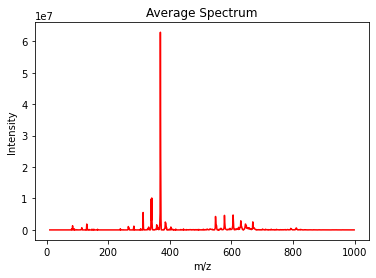

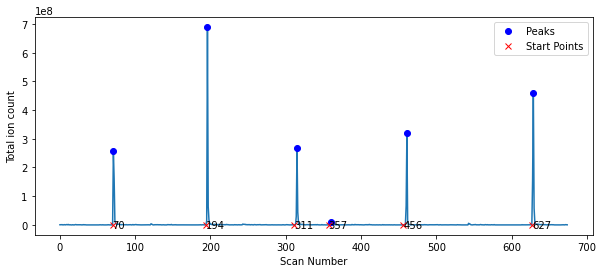

C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(tic[plot_points],'rx',color='r',label='Selected data points')


The ms_list csv file has been saved
The plot of all reps in the same figure saved
The plot of avg ms saved
avg ms csv file saved
Processing file: NP9118_C


C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaks, select[peaks], 'ro', label='Peaks',color='blue')


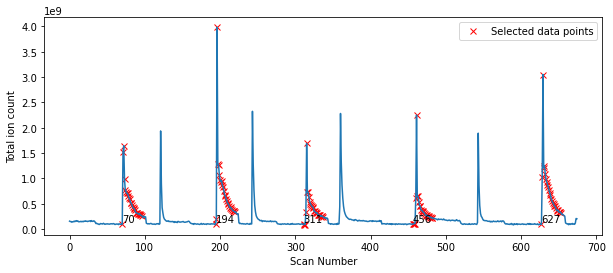

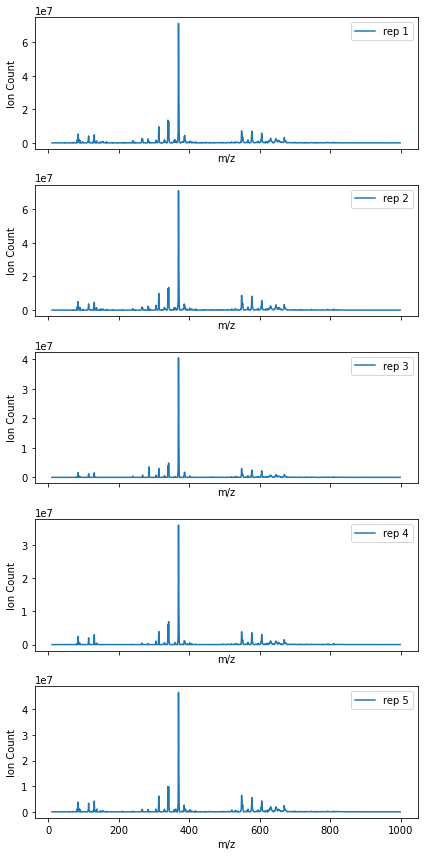

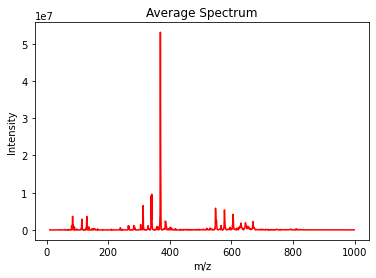

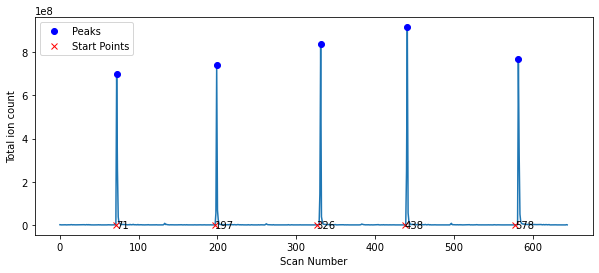

C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(tic[plot_points],'rx',color='r',label='Selected data points')


The ms_list csv file has been saved
The plot of all reps in the same figure saved
The plot of avg ms saved
avg ms csv file saved
All files processed.


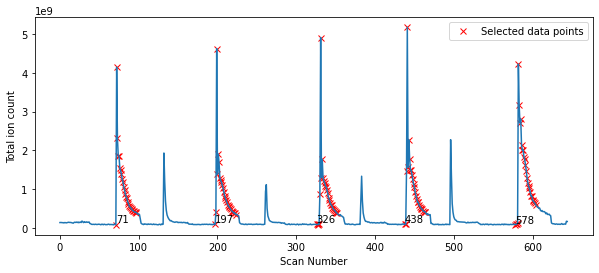

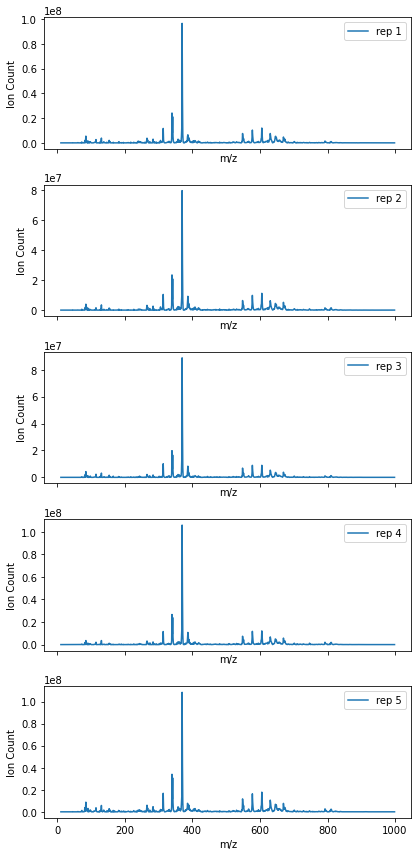

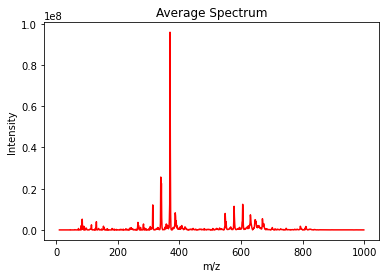

In [6]:
# Set the threshold for the highest peak for detection
find_threshold = 1e7

# Get a list of all CSV files in the directory
csv_files = [os.path.basename(file).replace('.csv', '') for file in glob.glob(f"{folder_path}/*.csv")]

# Loop through each file and process it
for csv in csv_files:
    print(f"Processing file: {csv}")
    
    # Read the raw data for the current file
    df_data, tic, bg, file,select = read_raw_data(f"{folder_path}{csv}.csv", bg_time)

    filename = file  # Name for the CSV files
    # Find the start points in the TIC data
    start_points=find_and_extend_start_points(select, find_threshold,reps)
    
    # Set insert points as the start points
    insert_points = start_points
    
    # Plot and save the insert points on the TIC data
    plot_insert_points(insert_points,tic,fig_path,file,sp_time)
    
    # Process the data and save the results
    data_process(df_data,insert_points,bg,reps,sp_time,data_path,fig_path,file)
print("All files processed.")


In [8]:
## Read raw data manually
df_data, tic, bg, file,select =read_raw_data(f"{folder_path}filename.csv",bg_time)

C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaks, select[peaks], 'ro', label='Peaks',color='blue')


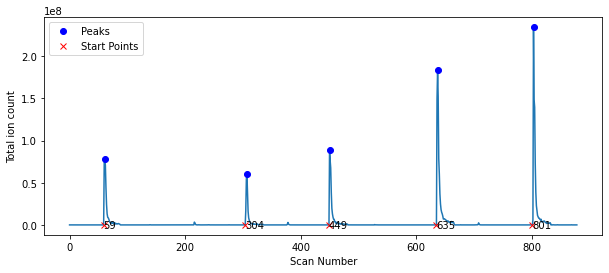

Potential insert points:  ([59, 304, 449, 635, 801], array([ 61, 307, 450, 637, 803], dtype=int64))
Enter . if there is no problem or enter the desired insert points (separated by commas): 59, 304, 449, 635, 801


C:\Users\chem-hert6392\code\freshtumour\dataprocessing-bin1.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(tic[plot_points],'rx',color='r',label='Selected data points')


The ms_list csv file has been saved
The plot of all reps in the same figure saved
The plot of avg ms saved
avg ms csv file saved


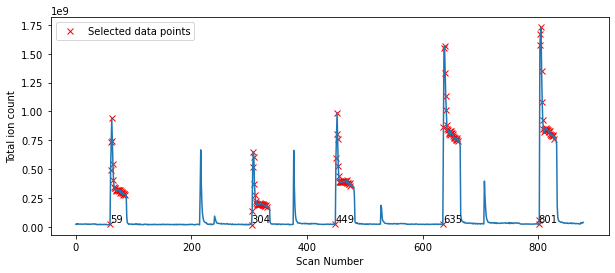

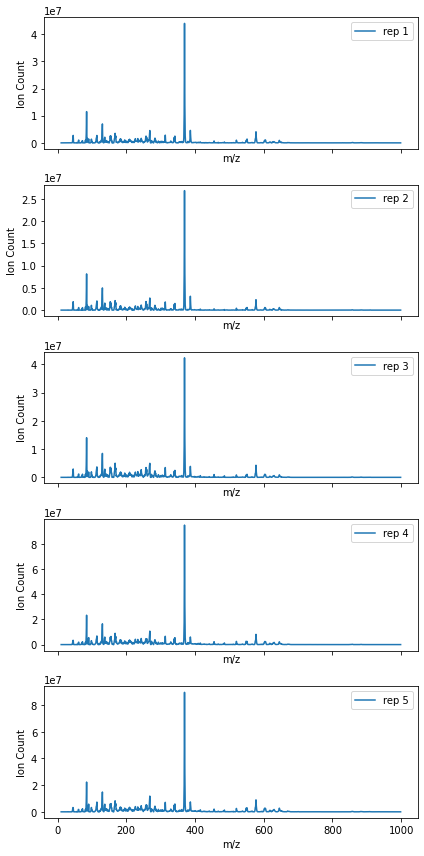

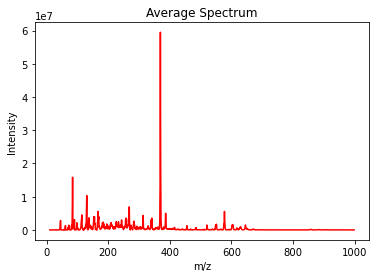

In [9]:
# Set Shreshold for detection
find_shreshold = 1e7
# Find peaks and start points in the TIC data using find_peaks function
start_points = find_start_points(select,find_shreshold)
insert_points = get_user_input_insert_points(start_points)
plot_insert_points(insert_points,tic,fig_path,file,sp_time)
# Process the data and save.files

data_process(df_data,insert_points,bg,reps,sp_time,data_path,fig_path,file)

In [12]:
# This is used when you want to combine all the data together
def combine_csv_files_by_column(input_folder, output_file,start,end):
    csv_files = [f for f in os.listdir(input_folder) if f.startswith(start)and f.endswith(end)]
    combined_data = None

    for file in csv_files:
        file_path = os.path.join(input_folder, file)
        data = pd.read_csv(file_path)

        if combined_data is None:
            combined_data = data
        else:
            combined_data = pd.concat([combined_data, data], axis=0)

    combined_data.to_csv(output_file, index=False)

In [10]:
# Combine
name = 'name of your new file'
# if your file has a common start, change start, if not, leave it empty
start = 'start'
# if your file has a common end, change start, if not, leave as .csv

end = '.csv'
input_folder = 'the folder where you have all your data'
output_path = 'the folder where you want to save the data'
if not os.path.exists(output_path):
    os.makedirs(output_path)
output_file = os.path.join(output_path,f'{name}.csv')

combine_csv_files_by_column(input_folder, output_file,start,end)
